In [1]:
%reset
%load_ext autoreload
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import scipy as sp

from scipy import signal
from scipy import io as sio

import neurodsp as ndsp
from neurodsp import spectral
from neurodsp import filt

from jupyterthemes import jtplot
jtplot.style()

import matplotlib.pyplot as plt
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Generating a Weak PING
Here, I modify several parameters at a time from Malerba et al. (2016) network model in order to generate a weak PING mechanism. The parameter values are drawn from _Hippocampal Microcircuits_ book chapter by Paola and others. The parameters drawn from this chapter do not necessarily have a one-to-one mapping with the parameters in Paola's model (or, more likely, I have trouble identifying the relationship), so there is likely to be error associated with each of my modifications. 

## First attempt
| book params | model params | new value | orig value | 
| --- | --- | --- | --- | 
| g_(stoch,E) | p.gnoiseE |  0.01 | 80 |
| tau_(D,stoch,E) | p.tauEd | 3 | 3.5 |
| g_bar_II | p.gmaxII | 0.5 | 3/(80/100) = 3.75 | 
| g_bar_EI | p.gmaxEI | 0.5 | 2/(30/100) = 6.7 |
| g_bar_IE | p.gmaxIE | 1.5 | 5/(60/100) = 8.3 |
| I_E | p.Edc | 1.25 | 40 | 


In [24]:
sim01_weakPING_01 = sio.loadmat('sim1_weakPING_hippobook_simdur2sec.mat',squeeze_me=True)

# get the spike times for excitatory and inhibitory neurons
spktimes_e_weakPING_01 = np.atleast_1d(sim01_weakPING_01['tsp_E']['times'])
cell_id_e_weakPING_01 = np.atleast_1d(sim01_weakPING_01['tsp_E']['celln'])

spktimes_i_weakPING_01 = np.atleast_1d(sim01_weakPING_01['tsp_I']['times'])
cell_id_i_weakPING_01 = np.atleast_1d(sim01_weakPING_01['tsp_I']['celln'])

dict_Espktrns_weakPING_01 = {'cell_id':cell_id_e_weakPING_01[0],
               'spktimes':spktimes_e_weakPING_01[0]}
dict_Ispktrns_weakPING_01 = {'cell_id':cell_id_i_weakPING_01[0],
               'spktimes':spktimes_i_weakPING_01[0]}

df_Espktrns_weakPING_01 = pd.DataFrame(dict_Espktrns_weakPING_01)
df_Ispktrns_weakPING_01 = pd.DataFrame(dict_Ispktrns_weakPING_01)

# get the raw lfp
lfp_weakPING_01 = np.atleast_1d(sim01_weakPING_01['lfp'])

# define the time axis & bandpass
fs = 1000 # [=Hz] sampling rate
t = np.arange(len(lfp_weakPING_01))/fs
f_range_ripple = (100, 300) #[=Hz]
f_range_higamma = (65,95)  #[=Hz]
f_range_logamma = (35,55)  #[=Hz]
f_range_beta = (15,35)  #[=Hz]
f_range_theta = (4,12)  #[=Hz]

# get the filtered lfp
filt_lfp_ripple_weakPING_01 = filt.filter_signal(lfp_weakPING_01, fs, 'bandpass', f_range)
filt_lfp_higamma_weakPING_01 = filt.filter_signal(lfp_weakPING_01, fs, 'bandpass', f_range_higamma)
filt_lfp_logamma_weakPING_01 = filt.filter_signal(lfp_weakPING_01, fs, 'bandpass', f_range_logamma)

df_lfp_weakPING_01 = pd.DataFrame({'time': t,
                                'lfp': lfp_weakPING_01,
                                'filt lfp': filt_lfp_ripple_weakPING_01,
                       'filt lfp: hi gamma': filt_lfp_higamma_weakPING_01,
                       'filt lfp: lo gamma': filt_lfp_logamma_weakPING_01})


###### ------------------------------------------------------------------------------######
###### ------------------------------------------------------------------------------######

# extract the original network simulation to compare against
sim01_origparams = sio.loadmat('example_2sec.mat',squeeze_me=True)

spktimes_e = np.atleast_1d(sim01_origparams['tsp_E']['times'])
cell_id_e = np.atleast_1d(sim01_origparams['tsp_E']['celln'])

spktimes_i = np.atleast_1d(sim01_origparams['tsp_I']['times'])
cell_id_i = np.atleast_1d(sim01_origparams['tsp_I']['celln'])

dict_Espktrns = {'cell_id':cell_id_e[0],
               'spktimes':spktimes_e[0]}
dict_Ispktrns = {'cell_id':cell_id_i[0],
               'spktimes':spktimes_i[0]}

df_Espktrns = pd.DataFrame(dict_Espktrns)
df_Ispktrns = pd.DataFrame(dict_Ispktrns)

# get the raw and filtered lfp
lfp = np.atleast_1d(sim01_origparams['lfp'])

# get the filtered lfp

filt_lfp_ripple = filt.filter_signal(lfp, fs, 'bandpass', f_range_ripple)
filt_lfp_higamma = filt.filter_signal(lfp, fs, 'bandpass', f_range_higamma)
filt_lfp_logamma = filt.filter_signal(lfp, fs, 'bandpass', f_range_logamma)

df_lfp = pd.DataFrame({'time': t,
                       'lfp': lfp,
                       'filt lfp: ripple': filt_lfp_ripple,
                       'filt lfp: hi gamma': filt_lfp_higamma,
                       'filt lfp: lo gamma': filt_lfp_logamma})

Transition bandwidth is 43.9 Hz. Pass/stop bandwidth is 200 Hz
Transition bandwidth is 21.5 Hz. Pass/stop bandwidth is 30 Hz
Transition bandwidth is 12.7 Hz. Pass/stop bandwidth is 20 Hz
Transition bandwidth is 43.9 Hz. Pass/stop bandwidth is 200 Hz
Transition bandwidth is 21.5 Hz. Pass/stop bandwidth is 30 Hz
Transition bandwidth is 12.7 Hz. Pass/stop bandwidth is 20 Hz


(0, 1.5)

<Figure size 432x288 with 0 Axes>

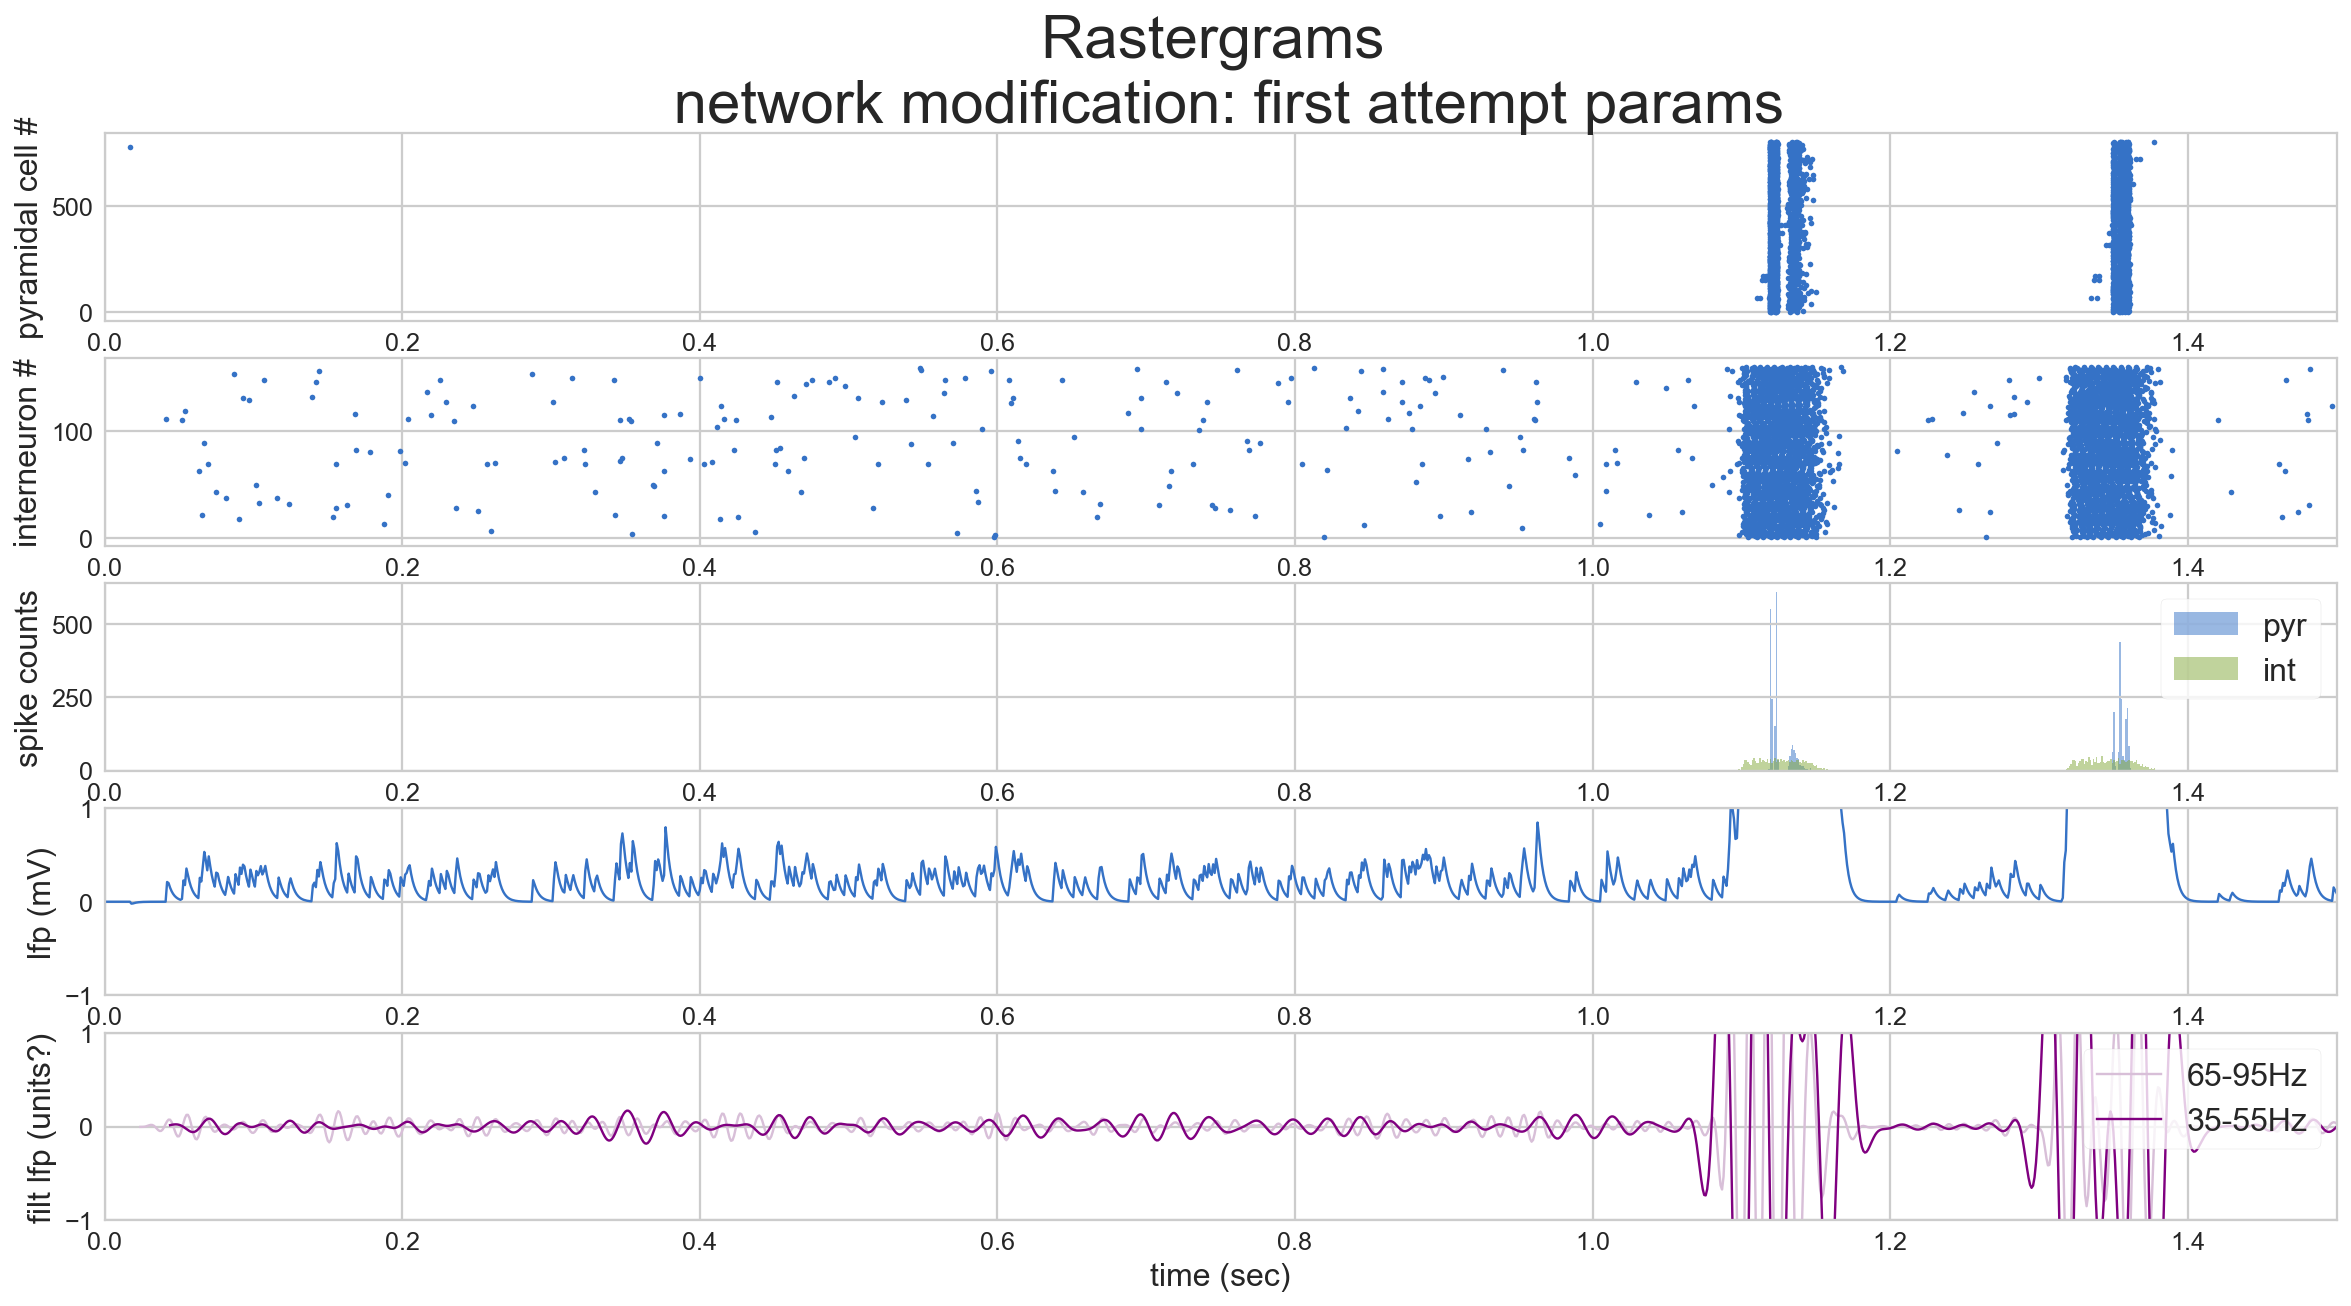

In [23]:
ts = 1.5    # window duration
y_fonts = 16;

plt.figure()
plt.figure(figsize=(20,10))
plt.tick_params(axis='both',labelsize=20)
# ----------------------------plot pyr cell rasters----------------------------------------
rescale_x = (0, ts);

df_Espktrns_weakPING_01_partial = df_Espktrns_weakPING_01[df_Espktrns_weakPING_01['spktimes']<=ts]
plt.subplot(5,1,1)
plt.plot(df_Espktrns_weakPING_01_partial['spktimes'], df_Espktrns_weakPING_01_partial['cell_id'],'.')
plt.ylabel('pyramidal cell #',fontsize=y_fonts)
plt.xlim(rescale_x)
plt.title('Rastergrams \n network modification: first attempt params',fontsize=30)

# df_Espktrns_partial = df_Espktrns[df_Espktrns['spktimes']<=ts]
# plt.subplot(5,2,2)
# plt.plot(df_Espktrns['spktimes'], df_Espktrns['cell_id'],'.')
# plt.xlim(rescale_x)
# plt.title('Rastergrams \n network modification: none',fontsize=30)

# ----------------------------plot interneuron rasters--------------------------------------

df_Ispktrns_weakPING_01_partial = df_Ispktrns_weakPING_01[df_Ispktrns_weakPING_01['spktimes']<=ts]
plt.subplot(5,1,2)
plt.plot(df_Ispktrns_weakPING_01['spktimes'], df_Ispktrns_weakPING_01['cell_id'],'.')
plt.ylabel('interneuron #',fontsize=y_fonts)
plt.xlim(rescale_x)

# df_Ispktrns_partial = df_Ispktrns[df_Ispktrns['spktimes']<=ts]
# plt.subplot(5,2,4)
# plt.plot(df_Ispktrns['spktimes'], df_Ispktrns['cell_id'],'.')
# plt.xlim(rescale_x)

# ----------------------------plot spike histograms--------------------------------------

plt.subplot(5,1,3)
plt.hist(df_Espktrns_weakPING_01_partial['spktimes'],t,alpha=0.5,label='pyr')
plt.hist(df_Ispktrns_weakPING_01_partial['spktimes'],t,alpha=0.5,label='int')
plt.legend(loc='upper right',fontsize=y_fonts)
plt.ylabel('spike counts',fontsize=y_fonts)
plt.xlim(rescale_x)

# plt.subplot(5,2,6)
# plt.hist(df_Espktrns_partial['spktimes'],t,alpha=0.5)
# plt.hist(df_Ispktrns_partial['spktimes'],t,alpha=0.5)
# plt.xlim(rescale_x)

# ----------------------------plot raw lfp--------------------------------------------------
rescale_y = (-1.0, 1.0)

df_lfp_weakPING_01_partial = df_lfp_weakPING_01[df_lfp_weakPING_01['time']<=ts]
plt.subplot(5,1,4)
plt.plot(df_lfp_weakPING_01_partial['time'],df_lfp_weakPING_01_partial['lfp'])
plt.ylabel('lfp (mV)',fontsize=y_fonts)
plt.ylim(rescale_y)
plt.xlim(rescale_x)

# df_lfp_partial = df_lfp[df_lfp['time']<=ts]
# plt.subplot(5,2,8)
# plt.plot(df_lfp_partial['time'], df_lfp_partial['lfp'])
# plt.ylim(rescale_y)
# plt.xlim(rescale_x)

# ----------------------------plot filtered lfp----------------------------------------------
rescale_y = (-1.0, 1.0)

plt.subplot(5,1,5)
f1 = plt.plot(df_lfp_weakPING_01_partial['time'],df_lfp_weakPING_01_partial['filt lfp: hi gamma'],color='thistle')
f2 = plt.plot(df_lfp_weakPING_01_partial['time'],df_lfp_weakPING_01_partial['filt lfp: lo gamma'],color='purple')
plt.ylabel('filt lfp (units?)',fontsize=y_fonts)
plt.xlabel('time (sec)',fontsize=y_fonts)
plt.legend((f1[0],f2[0]),('65-95Hz','35-55Hz'),fontsize=y_fonts)
plt.ylim(rescale_y)
plt.xlim(rescale_x)

# plt.subplot(5,2,10)
# f1 = plt.plot(df_lfp_partial['time'],df_lfp_partial['filt lfp: hi gamma'],color='thistle')
# f2 = plt.plot(df_lfp_partial['time'],df_lfp_partial['filt lfp: lo gamma'],color='purple')
# plt.xlabel('time (sec)',fontsize=30)
# plt.ylim(rescale_y)
# plt.xlim(rescale_x)


Well, I clearly misinterpreted the relationship between book and model parameters--I did not expect to reduce so drastically the amount of pyramidal cells that are able to fire in the absence of extrinsic input.

I should have expected this outcome because: 
<br>
(1) I drastically reduced the peak conductance across the board
<br>
(2) I drastically reduced the pyramidal cell baseline excitability
